In [2]:
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(font_scale=2.0)


# Loading Scraped Data

In [3]:
pd.read_csv('~/Documents/Bootcamp/zocdoc_scrapysplash/zocdoc/zocdocdoctors_clean.csv')


,board_certs,doctor,doctor_type,education,gender,individual_rating,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards
0,NaN,Dr. Sam Na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dr. Alexandra Yungelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Dr. Nirooch Suebsanguan (Nathan Sang),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Dr. Svetlana Monastyrskaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Dr. Mee Kyung (Michelle) Han,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Dr. Priya Sekhri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Dr. Steven Ritholtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Dr. Matthew Hausserman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Dr. Azar Boujaran-Ghomi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Dr. Brian Quinn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
zocdocs_df = pd.read_csv('~/Documents/Bootcamp/zocdoc_scrapysplash/zocdoc/zocdocdoctors_clean.csv')
zocdocs_df

,board_certs,doctor,doctor_type,education,gender,individual_rating,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards
0,NaN,Dr. Sam Na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dr. Alexandra Yungelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Dr. Nirooch Suebsanguan (Nathan Sang),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Dr. Svetlana Monastyrskaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Dr. Mee Kyung (Michelle) Han,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Dr. Priya Sekhri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Dr. Steven Ritholtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Dr. Matthew Hausserman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Dr. Azar Boujaran-Ghomi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Dr. Brian Quinn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data

In [5]:
#dropping duplicates and doctors with blank information 
zocdocs_df2=zocdocs_df.dropna(subset=['doctor_type','education','board_certs','gender','individual_rating','npi','overall_patient_ratings','overall_rating','practice','street_address','city_state','zoc_awards'], how='all')
zocdocs_df2=zocdocs_df2.drop_duplicates()



In [6]:
#removing white space 
zocdocs_df2.dtypes
zocdocs_df2['overall_patient_ratings'] = zocdocs_df2['overall_patient_ratings'].str.strip('[]')


In [7]:
#splitting the overall patient rating, wait rating, and bedside rating into separate columns 
zoc_df3=zocdocs_df2.join(zocdocs_df2['overall_patient_ratings'].str.split(',', 2, expand=True).rename(columns={0:'overall_p_rating', 1:'wait_rating', 2:'bedside_rating'}))


In [8]:
#removing redundant rating columns 
zoc_df3.drop('overall_p_rating', axis=1, inplace=True)
zoc_df3.drop('individual_rating', axis=1, inplace=True)
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,English,1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"English,French",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","icon-speedy-response,icon-scheduling-hero",5,4.5
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,English,1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",icon-scheduling-hero,5,5
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"English,French,Romanian",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","icon-see-you-again,icon-speedy-response,icon-s...",5,5
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"English,Spanish",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","icon-see-you-again,icon-rapid-registration,ico...",4.5,5
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"English,Russian",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","icon-see-you-again,icon-speedy-response",4.5,5
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,English,1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","icon-see-you-again,icon-rapid-registration,ico...",4.5,4.5
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"Chinese (Mandarin),English",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","icon-see-you-again,icon-rapid-registration,ico...",3,4.5
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"Chinese (Cantonese),Chinese (Mandarin),English",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","icon-see-you-again,icon-speedy-response",5,5
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"Chinese (Mandarin),Chinese (Wenzhounese),English",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","icon-see-you-again,icon-rapid-registration,ico...",5,5


In [9]:
#function to change any languages that are more than one from one string to a list of lists 
def clean(seq_string):
    return list(map(str, seq_string.split(',')))

#making languages into a list of lists 
mask = zoc_df3['languages'].isnull() == False
zoc_df3.loc[mask,'languages'] = zoc_df3.loc[mask,'languages'].apply(lambda x: clean(x))


In [10]:
#creating a column counting # of languages 
zoc_df3['lang_len'] = zoc_df3['languages'].str.len()
zoc_df3.languages.dtype



dtype('O')

In [11]:
#making zoc awards into a list of lists 
mask2 = zoc_df3['zoc_awards'].isnull() == False
zoc_df3.loc[mask2,'zoc_awards'] = zoc_df3.loc[mask2,'zoc_awards'].apply(lambda x: clean(x))

In [12]:
#getting number of zocdoc awards per doctor 
zoc_df3['awards_len'] = zoc_df3['zoc_awards'].str.len()
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,1.0,NaN
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5,4.5,2.0,2.0
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5,5,1.0,1.0
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5,5,3.0,3.0
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5,2.0,3.0
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5,2.0,2.0
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3,4.5,2.0,3.0
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5,5,3.0,2.0
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5,5,3.0,3.0


In [13]:
#changing ratings to actual numbers 
zoc_df3['wait_rating']=pd.to_numeric(zoc_df3.wait_rating)
zoc_df3['bedside_rating']=pd.to_numeric(zoc_df3.bedside_rating)
zoc_df3['overall_rating']=pd.to_numeric(zoc_df3.overall_rating)
zoc_df3.wait_rating.dtype
zoc_df3.bedside_rating.dtype
zoc_df3.overall_rating.dtype

dtype('float64')

In [14]:
#classifying doctors into different boroughs as well as Jersey by office zip code 
zoc_df3.loc[zoc_df3['city_state'].str.contains('10011|10003|10026|10027|10030|10037|10039|10001|10018|10019|10020| \
10036|10029|10035|10010|10016|10017|10022|10012|10013|10014|10004|10005|10006|10007|10038|10280|10036|10176|10282|10122| \
10002|10009|10021|10028|10044|10065|10075|10128|10023|10024|10025|10031|10032|10033|10034|10040|10279|10002|10069|10175'),'boro']='Manhattan'
zoc_df3.loc[zoc_df3['city_state'].str.contains('11361|11362|11363|11364|11354|11355|11356|11357|11358|11359|11360 \
11365|11366|11367|11412|11423|11432|11433|11434|11435|11436|11101|11102|11103|11104|11105|11106|11374|11375|11379| \
11385|11691|11692|11693|11694|11695|11697|11004|11005|11411|11413|11422|11426|11427|11428|11429|11414|11415|11416|11417|11418|11419| \
11420|11421|11368|11369|11370|11372|11373|11377|11378|11360|11385'),'boro']='Queens'
zoc_df3.loc[zoc_df3['city_state'].str.contains('10453|10457|10460|10458|10467|10468|10451|10452|10456|10454|10455|10459|10474| \
10463|10471|10466|10469|10470|10475|10461|10462|10464|10465|10472|10473'),'boro']='Bronx'
zoc_df3.loc[zoc_df3['city_state'].str.contains('11212|11213|11216|11233|11238|11209|11214|11228|11204|11218| \
11219|11230|11234|11236|11239|11223|11224|11229|11235|11201|11205|11215|11217|11231|11203|11210|11225|11226| \
11207|11208|11211|11222|11220|11232|11206|11221|11237|11243|11242|11249|11219'),'boro']='Brooklyn'
zoc_df3.loc[zoc_df3['city_state'].str.contains('10302|10303|10310|10306|10307|10308|10309|10312|10301|10304|10305| \
10314'),'boro']='Staten Island' 
zoc_df3.loc[zoc_df3['city_state'].str.contains('NJ'),'boro']='New Jersey'
#f_recs[f_recs['Behavior'].str.contains("nt|nv", na=False)]
#titanic.loc[titanic['Name'].str.contains('Charles'), 'namest'] = 'Ch'
#zoc_df3["boro"][zoc_df3['city_state'].str.contains("10011")] = "Manhattan"
zoc_df3


,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn


In [15]:
#consolidating list of doctor types 
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Psychiatrist'),'dr_class']='Psychiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Psychotherapist'),'dr_class']='Psychotherapist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Psychologist'),'dr_class']='Psychologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Neurologist'),'dr_class']='Neurologist'
#zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Neurologist'),'dr_class']='Neurologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Gastroenterologist'),'dr_class']='Gastroenterologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Dentist|Orthodontist'),'dr_class']='Dental'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Practitioner'),'dr_class']='Nurse Practitioner'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Cardiologist'),'dr_class']='Cardiologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Physical'),'dr_class']='Physical Therapist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Chiropractor|Spine'),'dr_class']='Chiropractor'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Podiatrist'),'dr_class']='Podiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Dermatologist'),'dr_class']='Dermatologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('OB-GYN|Urogynecologist|Midwife'),'dr_class']='OB-GYN'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Surgeon'),'dr_class']='Surgeon'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Physiatrist|Sports'),'dr_class']='Physiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Ear, Nose'),'dr_class']='Ear, Nose, & Throat Doctor'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Optometrist'),'dr_class']='Optometrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Primary Care|Pediatrician|Family|Pediatric'),'dr_class']='Primary Care Doctor'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Ophthalmologist|Optometrist'),'dr_class']='Eye Treatment'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Urologist|Optometrist'),'dr_class']='Eye Treatment'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Podiatrist'),'dr_class']='Podiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Internist'),'dr_class']='Internist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Radiologist'),'dr_class']='Radiologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Urgent'),'dr_class']='Urgent Care'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Pain|Anesthesiologist'),'dr_class']='Urgent Care'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Oncologist'),'dr_class']='Oncologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Pulmonologist|Assistant|Audiologist|Endocrinologist|Allergist'),'dr_class']='Misc'
zoc_df3
#zoc_df3


,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,dr_class
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan,Psychotherapist
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,Psychotherapist
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,Psychologist
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey,Psychiatrist
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,Internist
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,Dental
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,Neurologist
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn,OB-GYN
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,Physiatrist
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn,Primary Care Doctor


# Data Analysis and Visualizations

In [16]:
#creating a binary column for gender 
zoc_df3.loc[zoc_df3['gender'].str.contains('Female'),'gender2']=1
zoc_df3.loc[zoc_df3['gender'].str.contains('Male'),'gender2']=2

In [17]:
#categorizing boros by #'s 
zoc_df3.loc[zoc_df3['boro'].str.contains('Manhattan'),'boro2']=1
zoc_df3.loc[zoc_df3['boro'].str.contains('Brooklyn'),'boro2']=2
zoc_df3.loc[zoc_df3['boro'].str.contains('Queens'),'boro2']=3
zoc_df3.loc[zoc_df3['boro'].str.contains('Staten Island'),'boro2']=4
zoc_df3.loc[zoc_df3['boro'].str.contains('Bronx'),'boro2']=5
zoc_df3.loc[zoc_df3['boro'].str.contains('New Jersey'),'boro2']=6

In [18]:
zoc_df3.gender2=zoc_df3.gender2.astype(dtype=int)
zoc_df3.boro2=zoc_df3.boro2.astype(dtype=int)
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,...,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,dr_class,gender2,boro2
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD",...,"New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan,Psychotherapist,1,1
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,...,"New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,Psychotherapist,2,1
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,...,"Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,Psychologist,2,1
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.",...,"New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey,Psychiatrist,1,6
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,...,"New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,Internist,2,1
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,...,"Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,Dental,2,1
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,...,"Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,Neurologist,2,2
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,...,"New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn,OB-GYN,1,2
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,...,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,Physiatrist,2,1
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,...,"Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn,Primary Care Doctor,1,2


In [19]:
print(zoc_df3.wait_rating.median())
print(zoc_df3.bedside_rating.median())
print(zoc_df3.overall_rating.median())

4.5
5.0
5.0


In [20]:
#zoc_df3.groupby(['boro'])['boro'].agg("count")


conditions = [
    (zoc_df3['boro'] == 'Bronx'),
    (zoc_df3['boro'] == 'Brooklyn'),
    (zoc_df3['boro'] == 'Manhattan'),
    (zoc_df3['boro'] == 'New Jersey'),
    (zoc_df3['boro'] == 'Queens'),
    (zoc_df3['boro'] == 'Staten Island')]
choices = [21,265,652,105,70,8]
zoc_df3['boro_count'] = np.select(conditions, choices, default='black')
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,...,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,dr_class,gender2,boro2,boro_count
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD",...,NaN,4.5,4.5,1.0,NaN,Manhattan,Psychotherapist,1,1,652
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,...,"[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,Psychotherapist,2,1,652
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,...,[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,Psychologist,2,1,652
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.",...,"[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey,Psychiatrist,1,6,105
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,...,"[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,Internist,2,1,652
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,...,"[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,Dental,2,1,652
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,...,"[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,Neurologist,2,2,265
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,...,"[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn,OB-GYN,1,2,265
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,...,"[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,Physiatrist,2,1,652
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,...,"[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn,Primary Care Doctor,1,2,265


In [21]:
zoc_df3.boro_count=zoc_df3.boro_count.astype(dtype=int)

In [22]:
zoc_df3 = zoc_df3.reset_index()

In [23]:
zoc_df3[zoc_df3.gender=="Male"]

,index,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,...,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,dr_class,gender2,boro2,boro_count
1,159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,...,"[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,Psychotherapist,2,1,652
2,161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,...,[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,Psychologist,2,1,652
4,165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,...,"[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,Internist,2,1,652
5,166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,...,"[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,Dental,2,1,652
6,169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,...,"[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,Neurologist,2,2,265
8,171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,...,"[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,Physiatrist,2,1,652
11,175,New York-Presbyterian Hospital / Weill Cornell...,"Dr. Laurence Saul, MD","Child and Adolescent Psychiatrist, Psychiatrist",NewYork-Presbyterian Hospital / Columbia Unive...,Male,[English],1.821147e+09,"4,4.5,4",4.0,...,"[icon-rapid-registration, icon-scheduling-hero]",4.5,4.0,1.0,2.0,Manhattan,Psychiatrist,2,1,652
14,179,Lenox Hill Hospital,"Dr. Patrick Jean-Pierre, MD","Sports Medicine Specialist, Internist","Henry Ford Hospital, Fellowship in Primary Car...",Male,[English],1.548423e+09,"5,5,5",5.0,...,[icon-see-you-again],5.0,5.0,1.0,1.0,Manhattan,Internist,2,1,652
15,180,"Lenox Hill Hospital,The Mount Sinai Hospital","Dr. Mark Mohrmann, MD","Hand Surgeon, Orthopedic Surgeon","Hospital for Joint Diseases, Residency in Orth...",Male,"[English, Spanish]",1.306850e+09,"4.5,4.5,4.5",4.5,...,"[icon-see-you-again, icon-speedy-response]",4.5,4.5,2.0,2.0,Manhattan,Surgeon,2,1,652
16,182,NaN,"Dr. Chia-Hung (Tony) Lin, DDS",Orthodontist,"Dental School - University of Western Ontario,...",Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.407169e+09,"5,4.5,5",5.0,...,[icon-scheduling-hero],4.5,5.0,3.0,1.0,Manhattan,Dental,2,1,652


In [24]:
conditions = [
    (zoc_df3['gender'] == 'Female'),
    (zoc_df3['gender'] == 'Male')]
choices = [451,670]
zoc_df3['gender_count'] = np.select(conditions, choices, default='black')
zoc_df3

,index,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,...,wait_rating,bedside_rating,lang_len,awards_len,boro,dr_class,gender2,boro2,boro_count,gender_count
0,157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,NaN,Manhattan,Psychotherapist,1,1,652,451
1,159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,...,5.0,4.5,2.0,2.0,Manhattan,Psychotherapist,2,1,652,670
2,161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,...,5.0,5.0,1.0,1.0,Manhattan,Psychologist,2,1,652,670
3,162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,New Jersey,Psychiatrist,1,6,105,451
4,165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,3.0,Manhattan,Internist,2,1,652,670
5,166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,2.0,Manhattan,Dental,2,1,652,670
6,169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,3.0,Brooklyn,Neurologist,2,2,265,670
7,170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,...,3.0,4.5,2.0,3.0,Brooklyn,OB-GYN,1,2,265,451
8,171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,2.0,Manhattan,Physiatrist,2,1,652,670
9,173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,Brooklyn,Primary Care Doctor,1,2,265,451


In [25]:

#making rating counts by boro into percentages 

overall_rating_percents=zoc_df3.groupby(['overall_rating','boro','boro_count']).agg({'doctor':"count"}).reset_index()
overall_rating_percents=pd.DataFrame(overall_rating_percents)
overall_rating_percents['Percents']=overall_rating_percents['doctor']/overall_rating_percents['boro_count']*100

In [74]:
gender_percents=zoc_df3.groupby(['overall_rating','gender','gender_count']).agg({'doctor':"count"}).reset_index()
gender_percents=pd.DataFrame(gender_percents)
gender_percents.gender_count=gender_percents.gender_count.astype(dtype=int)
gender_percents['Percents']=gender_percents['doctor']/gender_percents['gender_count']*100

In [75]:
gender_percents

,overall_rating,gender,gender_count,doctor,Percents
0,2.5,Male,670,1,0.149254
1,3.5,Female,451,4,0.886918
2,3.5,Male,670,2,0.298507
3,4.0,Female,451,20,4.434590
4,4.0,Male,670,38,5.671642
5,4.5,Female,451,141,31.263858
6,4.5,Male,670,235,35.074627
7,5.0,Female,451,286,63.414634
8,5.0,Male,670,394,58.805970


In [27]:
gender_percents2=zoc_df3.groupby(['bedside_rating','gender','gender_count']).agg({'doctor':"count"}).reset_index()
gender_percents2=pd.DataFrame(gender_percents2)
gender_percents2.gender_count=gender_percents2.gender_count.astype(dtype=int)
gender_percents2['Percents']=gender_percents2['doctor']/gender_percents2['gender_count']*100

In [28]:
gender_percents3=zoc_df3.groupby(['wait_rating','gender','gender_count']).agg({'doctor':"count"}).reset_index()
gender_percents3=pd.DataFrame(gender_percents3)
gender_percents3.gender_count=gender_percents3.gender_count.astype(dtype=int)
gender_percents3['Percents']=gender_percents3['doctor']/gender_percents3['gender_count']*100

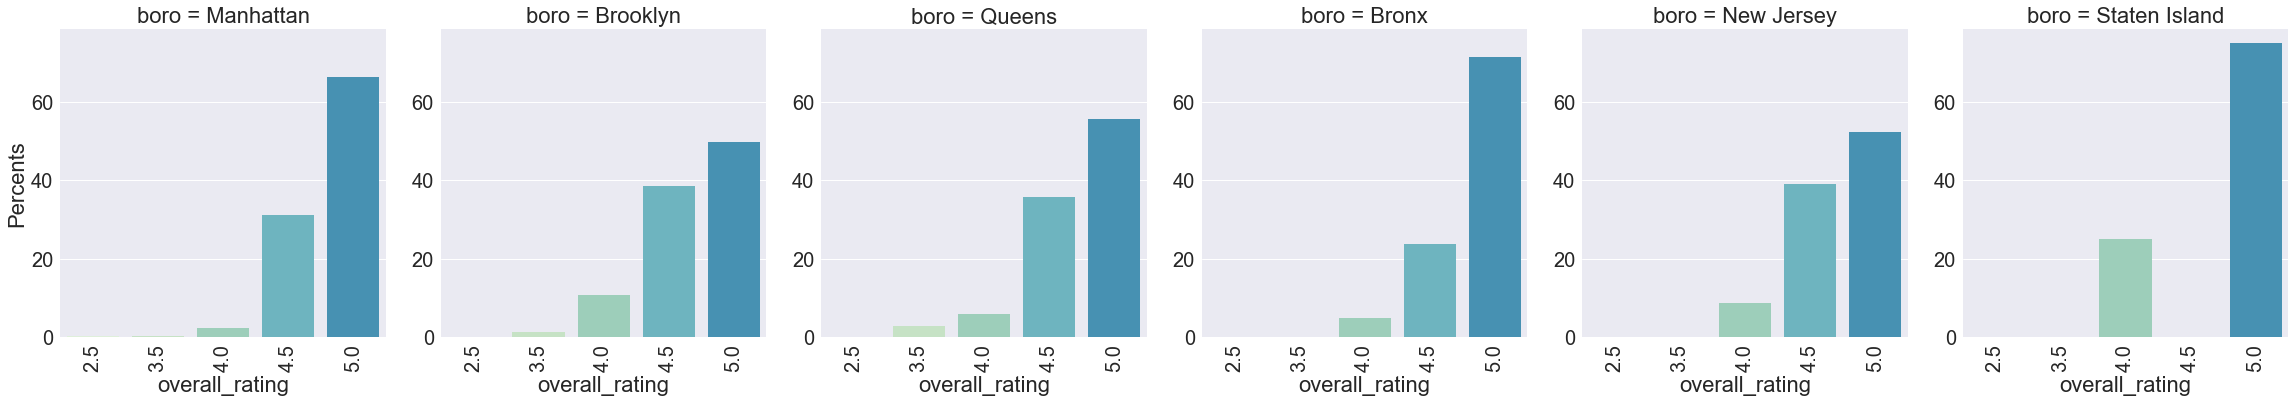

In [29]:
h = sns.factorplot(x="overall_rating", y="Percents", col="boro", data=overall_rating_percents, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)
sns.set(font_scale=2.5)

In [30]:
bedside_rating_percents=zoc_df3.groupby(['bedside_rating','boro','boro_count']).agg({'doctor':"count"}).reset_index()
bedside_rating_percents=pd.DataFrame(bedside_rating_percents)
bedside_rating_percents['Percents']=bedside_rating_percents['doctor']/bedside_rating_percents['boro_count']*100

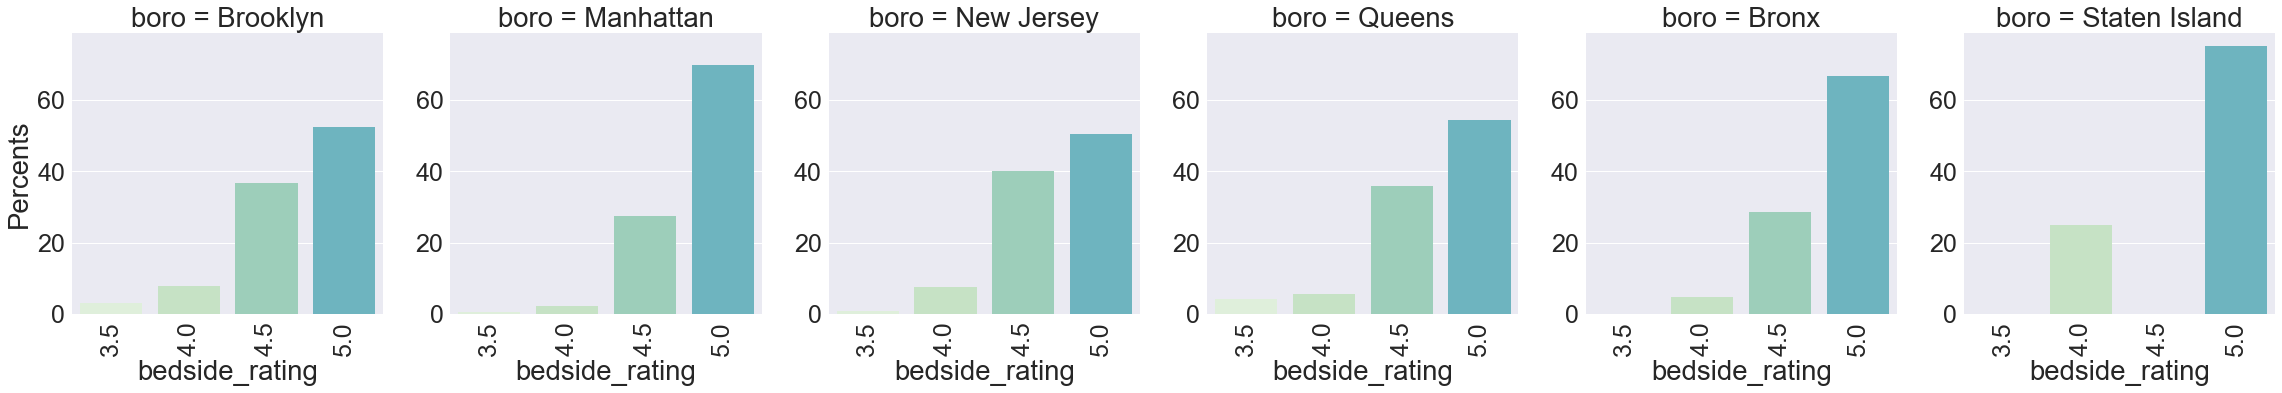

In [31]:
h = sns.factorplot(x="bedside_rating", y="Percents", col="boro", data=bedside_rating_percents, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)
sns.set(font_scale=2.5)

In [32]:
wait_rating_percents=zoc_df3.groupby(['wait_rating','boro','boro_count']).agg({'doctor':"count"}).reset_index()
wait_rating_percents=pd.DataFrame(wait_rating_percents)
wait_rating_percents['Percents']=wait_rating_percents['doctor']/wait_rating_percents['boro_count']*100

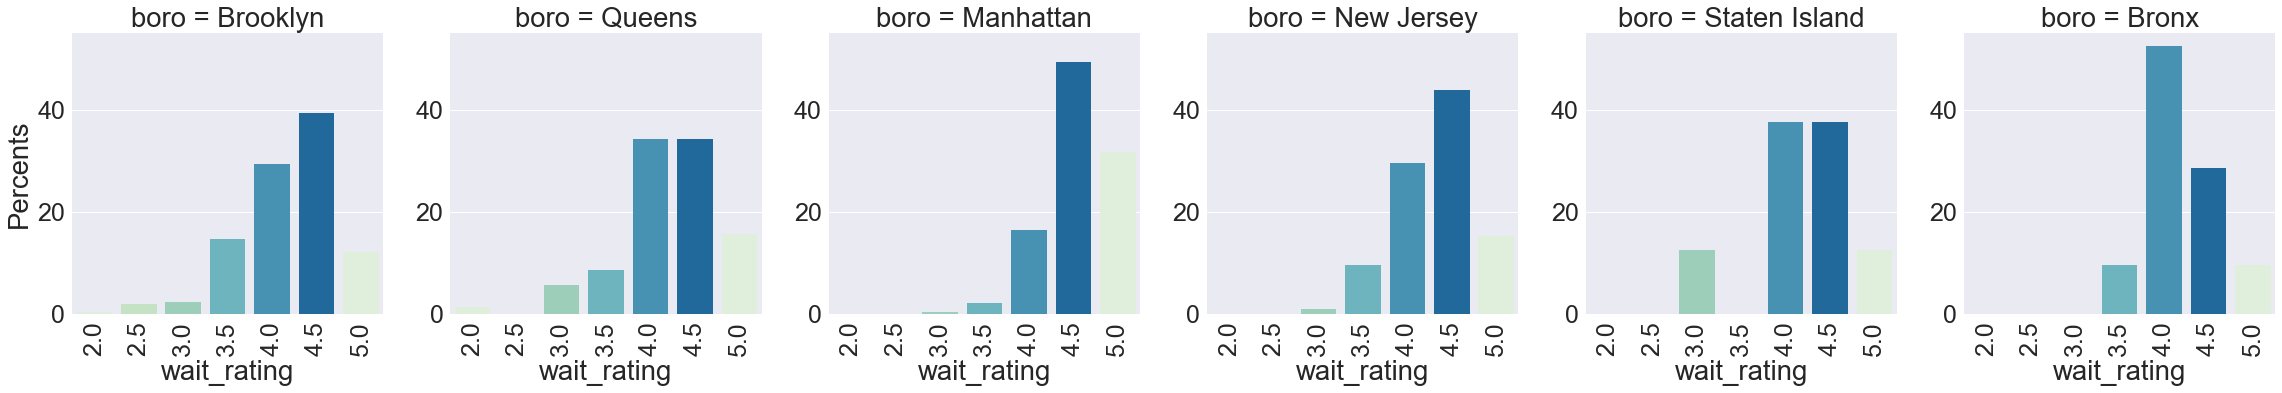

In [33]:
h = sns.factorplot(x="wait_rating", y="Percents", col="boro", data=wait_rating_percents, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

In [35]:
gender_percents=zoc_df3.groupby(['overall_rating','boro','boro_count']).agg({'doctor':"count"}).reset_index()


In [36]:
#from collections import Counter
#Counter(zoc_df3.doctor_type)

In [37]:

zoclangcomplete_df = zoc_df3[zoc_df3.languages.isnull()==False]
zoclangcomplete_df  #giving me a dataframe where all items in languages is complete 
#null_data = df[df.isnull().any(axis=1)]
zoclangcomplete2_df = zoclangcomplete_df.groupby('doctor').languages.apply(lambda x: pd.DataFrame(x.values[0])).reset_index().drop('level_1', axis = 1)

zoclangcomplete2_df.columns = ['doctor','languages']
zoclangcomplete2_df

#zoclangcomplete_df=zoclangcomplete_df.reset_index().set_index(['doctor','languages'])

,doctor,languages
0,"Abby Fashakin, FNP, MSN",English
1,"Abby Fashakin, FNP, MSN",Yoruba
2,"Allison Gill, PT",English
3,"Amir Rand, PT, DPT",English
4,"Andrew Eisen, DPT",English
5,"Angela M Godwin, NP",English
6,"Anthony Freire, LMHC",English
7,"Anthony Freire, LMHC",Portuguese
8,"Ashton Frulla, NP",English
9,"Barbara Tint, LCSW, PhD",English


In [38]:
zoclangcomplete_df = zoc_df3[zoc_df3.languages.isnull()==False]
zoclangcomplete_df

,index,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,...,wait_rating,bedside_rating,lang_len,awards_len,boro,dr_class,gender2,boro2,boro_count,gender_count
0,157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,NaN,Manhattan,Psychotherapist,1,1,652,451
1,159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,...,5.0,4.5,2.0,2.0,Manhattan,Psychotherapist,2,1,652,670
2,161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,...,5.0,5.0,1.0,1.0,Manhattan,Psychologist,2,1,652,670
3,162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,New Jersey,Psychiatrist,1,6,105,451
4,165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,3.0,Manhattan,Internist,2,1,652,670
5,166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,2.0,Manhattan,Dental,2,1,652,670
6,169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,3.0,Brooklyn,Neurologist,2,2,265,670
7,170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,...,3.0,4.5,2.0,3.0,Brooklyn,OB-GYN,1,2,265,451
8,171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,2.0,Manhattan,Physiatrist,2,1,652,670
9,173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,Brooklyn,Primary Care Doctor,1,2,265,451


In [39]:

regression_df=zoc_df3.dropna(subset = ['wait_rating', 'bedside_rating'])
regression_df

,index,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,...,wait_rating,bedside_rating,lang_len,awards_len,boro,dr_class,gender2,boro2,boro_count,gender_count
0,157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,NaN,Manhattan,Psychotherapist,1,1,652,451
1,159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,...,5.0,4.5,2.0,2.0,Manhattan,Psychotherapist,2,1,652,670
2,161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,...,5.0,5.0,1.0,1.0,Manhattan,Psychologist,2,1,652,670
3,162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,New Jersey,Psychiatrist,1,6,105,451
4,165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,3.0,Manhattan,Internist,2,1,652,670
5,166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,2.0,Manhattan,Dental,2,1,652,670
6,169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,3.0,Brooklyn,Neurologist,2,2,265,670
7,170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,...,3.0,4.5,2.0,3.0,Brooklyn,OB-GYN,1,2,265,451
8,171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,2.0,Manhattan,Physiatrist,2,1,652,670
9,173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,Brooklyn,Primary Care Doctor,1,2,265,451


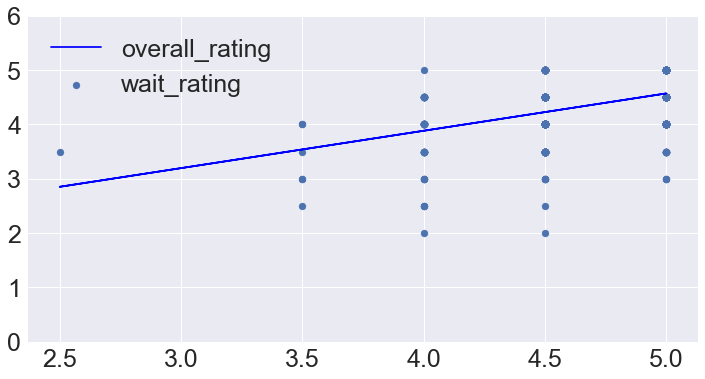

In [41]:
plt.figure(figsize = (12,6))
plt.scatter(regression_df['overall_rating'], regression_df['wait_rating'])
plt.ylim(0, 6)
#plt.xlim(3.5,4.5)
linregress(regression_df['overall_rating'], regression_df['wait_rating'])


f = lambda x: 0.68673397753961996*x +1.1350546196511413
# x values of line to plot
x = regression_df['overall_rating']
# plot fit
plt.plot(x,f(x), c="blue")
#sns.stripplot(x='species', y='petal_length', data=iris, jitter=True, 
             # edgecolor='none')
#better take min and max of x values
#
plt.legend()
plt.show()

In [43]:
merged_zoclang2_df=pd.merge(zoclangcomplete2_df, zoc_df3, how='left', on ='doctor').dropna()
merged_zoclang2_df=merged_zoclang2_df[merged_zoclang2_df.languages_x!="English"]
merged_zoclang2_df=merged_zoclang2_df.reset_index()
merged_zoclang2_df.groupby('boro')


In [44]:
zoc_df3.groupby('boro').count()

,index,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,...,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,dr_class,gender2,boro2,boro_count,gender_count
boro,,,,,,,,,,,,,,,,,,,,,
Bronx,21,14,21,21,21,21,21,21,21,21,...,20,21,21,21,20,21,21,21,21,21
Brooklyn,265,175,265,265,265,265,264,264,265,265,...,259,265,265,264,259,265,265,265,265,265
Manhattan,652,413,652,652,652,652,650,644,652,652,...,631,650,650,650,631,652,652,652,652,652
New Jersey,105,76,105,105,105,105,104,105,105,105,...,103,104,104,104,103,105,105,105,105,105
Queens,70,59,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
Staten Island,8,5,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [46]:
language_percents=merged_zoclang2_df.groupby(['languages_x','boro','boro_count']).agg({'doctor':"count"}).reset_index()
language_percents=pd.DataFrame(language_percents)
language_percents.boro_count=language_percents.boro_count.astype(dtype=int)
language_percents['Percents']=language_percents['doctor']/language_percents['boro_count']*100

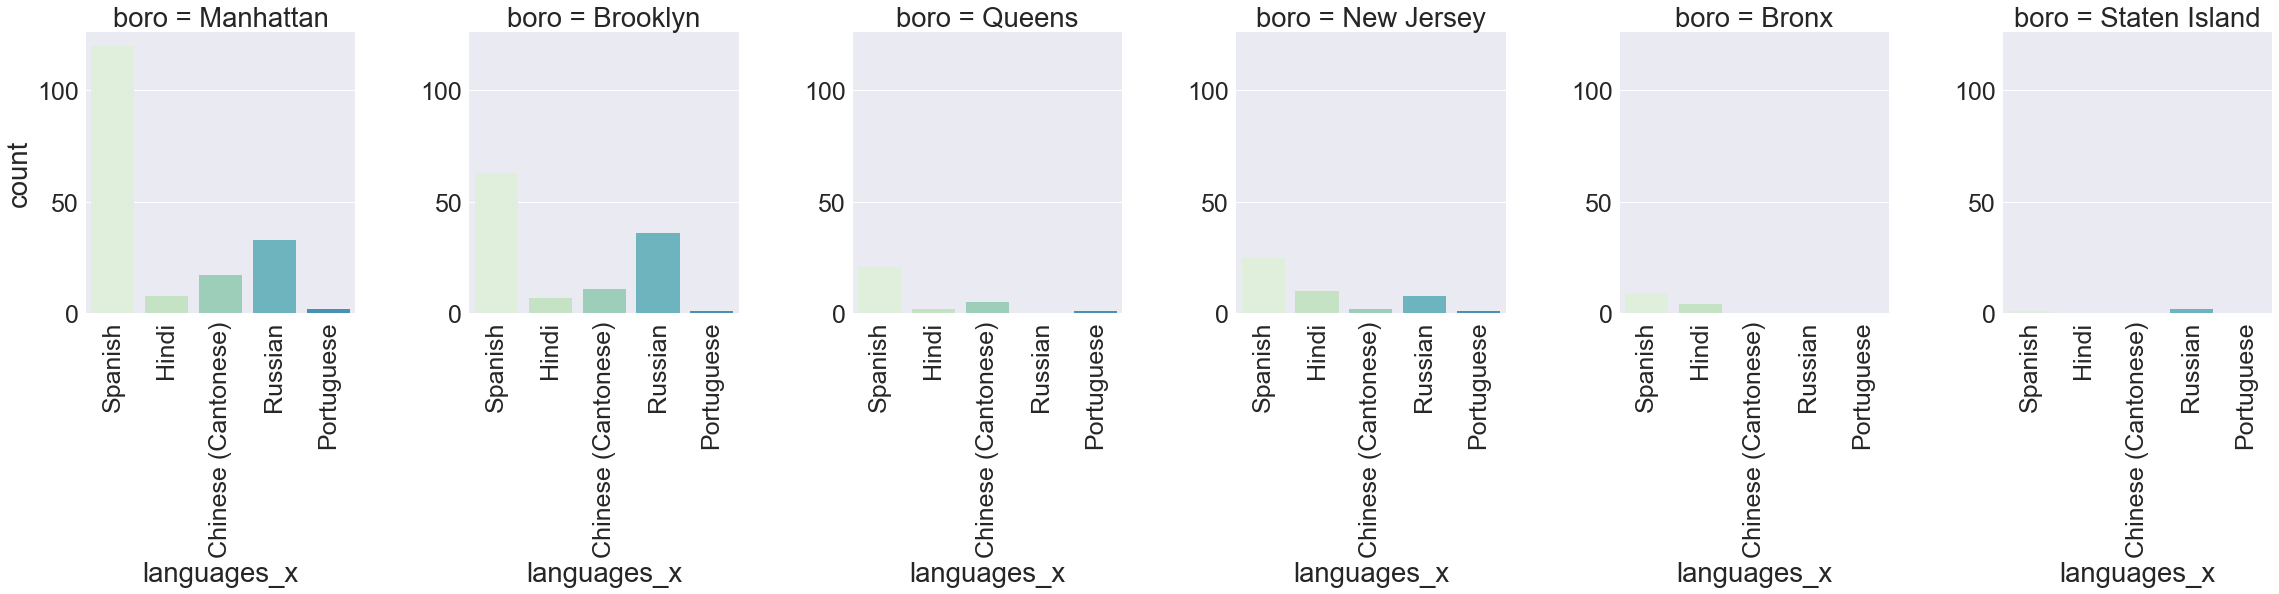

In [47]:
#top languages by boro (NJ not a boro but included)
h = sns.factorplot(x="languages_x", col="boro", data=merged_zoclang2_df, kind="count", size=6, order=language_percents.languages_x.value_counts().iloc[:5].index, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)



Text(0,0.5,'Number of Languages')

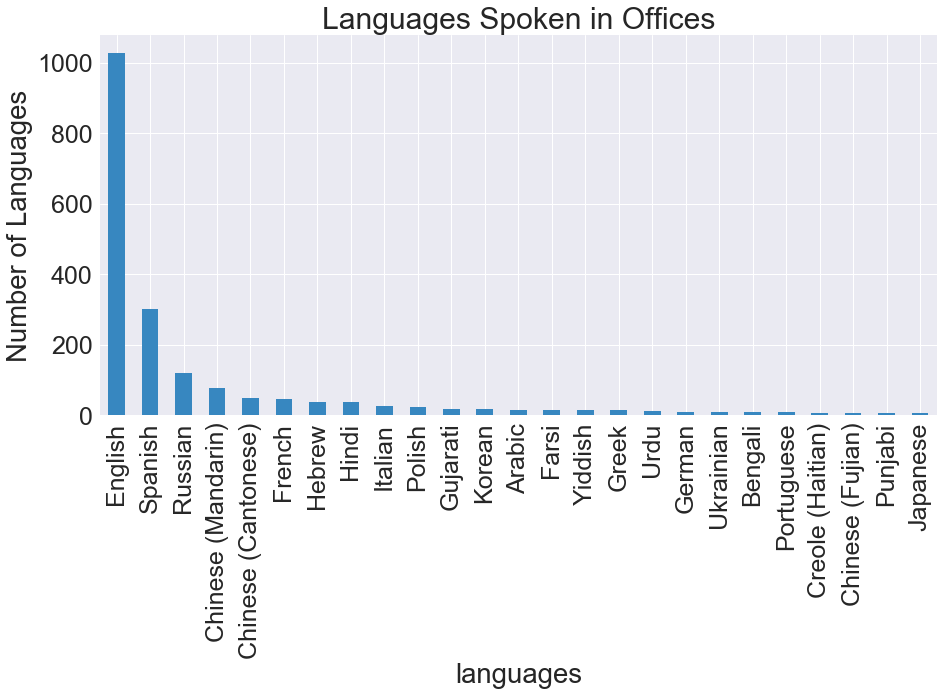

In [48]:
from matplotlib.colors import ListedColormap
#zoclangcomplete2_df.groupby('languages')['languages'].count().plot.bar()
plot5 = zoclangcomplete2_df.groupby('languages')['languages'].count().nlargest(25).plot(kind='bar', \
               title='Languages Spoken in Offices', figsize=(15,7),\
               colormap=ListedColormap(sns.color_palette("Blues_r", 2)),  )
plot5.set_ylabel('Number of Languages')


#from matplotlib.colors import ListedColormap
#df.set_index('App')\
#  .reindex_axis(df.set_index('App').sum().sort_values().index, axis=1)\
#  .T.plot(kind='bar', stacked=True,
#          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
#          figsize=(12,6))


In [50]:
#zoc_df3[zoc_df3.languages.isnull()==True]   this is where the languages are null
zoc_df3.bedside_rating.min()

3.5

In [51]:

zoc_df3.awards_len.mean()

2.4262144821264893

In [52]:
zoc_df3.groupby('boro')[['overall_rating','wait_rating','bedside_rating']].agg(['mean','std','min','max','median'])


overall_rating                            wait_rating            \
                        mean       std  min  max median        mean       std   
boro                                                                            
Bronx               4.833333  0.288675  4.0  5.0    5.0    4.190476  0.402374   
Brooklyn            4.684906  0.358551  3.5  5.0    4.5    4.184906  0.550274   
Manhattan           4.816718  0.280847  2.5  5.0    5.0    4.550000  0.382847   
New Jersey          4.719048  0.324658  4.0  5.0    5.0    4.317308  0.446441   
Queens              4.721429  0.367480  3.5  5.0    5.0    4.200000  0.586070   
Staten Island       4.750000  0.462910  4.0  5.0    5.0    4.187500  0.593867   

                               bedside_rating                             
               min  max median           mean       std  min  max median  
boro                                                                      
Bronx          3.5  5.0   4.00       4.809524  0.294796  4.0  5.0    5.0  
Brooklyn       2.0  5.0   4.50       4.692453  0.380315  3.5  5.0    5.0  
Manhattan      3.0  5.0   4.50       4.832308  0.275394  3.5  5.0    5.0  
New Jersey     3.0  5.0   4.50       4.706731  0.338548  3.5  5.0    5.0  
Queens         2.0  5.0   4.25       4.700000  0.393792  3.5  5.0    5.0  
Staten Island  3.0  5.0   4.25       4.750000  0.462910  4.0  5.0    5.0

In [53]:
#stats on # of languages spoken by area
zoc_df3.groupby('boro')[['lang_len']].agg(['mean','std','min','max'])

lang_len                    
                   mean       std  min  max
boro                                       
Bronx          2.047619  1.203170  1.0  4.0
Brooklyn       2.238636  1.310916  1.0  5.0
Manhattan      1.767692  1.005318  1.0  5.0
New Jersey     2.086538  1.158427  1.0  5.0
Queens         2.028571  0.977596  1.0  5.0
Staten Island  1.750000  0.886405  1.0  3.0

In [54]:
zoc_df3.groupby(['boro','gender'])[['gender']].agg(['count'])

gender
                      count
boro          gender       
Bronx         Female     11
              Male       10
Brooklyn      Female    100
              Male      165
Manhattan     Female    281
              Male      371
New Jersey    Female     32
              Male       73
Queens        Female     25
              Male       45
Staten Island Female      2
              Male        6

In [ ]:
#zoc_df3[pd.isnull(zoc_df3.boro)] when checking rows for nulls 

In [55]:
#count of dr types by gender 
drtype_gender_df=zoc_df3.groupby(['dr_class', 'gender'])[['dr_class']].agg("count")
        
drtype_gender_df

dr_class
dr_class                   gender          
Cardiologist               Female         6
                           Male          19
Chiropractor               Female        12
                           Male          42
Dental                     Female        22
                           Male          26
Dermatologist              Female        26
                           Male          12
Ear, Nose, & Throat Doctor Female        11
                           Male          47
Eye Treatment              Female       105
                           Male         160
Gastroenterologist         Female         9
                           Male          27
Internist                  Female        39
                           Male          58
Misc                       Female         5
                           Male          11
Neurologist                Female         5
                           Male           8
Nurse Practitioner         Female         9
                           Male           2
OB-GYN                     Female        34
                           Male          18
Oncologist                 Female         8
                           Male           6
Physiatrist                Female         4
                           Male          11
Physical Therapist         Female        16
                           Male           9
Podiatrist                 Female         8
                           Male          10
Primary Care Doctor        Female        93
                           Male          61
Psychiatrist               Female         9
                           Male          31
Psychologist               Female         4
                           Male           6
Psychotherapist            Female        10
                           Male           8
Radiologist                Male           5
Surgeon                    Female         6
                           Male          65
Urgent Care                Female        10
                           Male          28

In [68]:
gender_percents4=zoc_df3.groupby(['dr_class','gender','gender_count']).agg({'doctor':"count"}).reset_index()
gender_percents4=pd.DataFrame(gender_percents4)
gender_percents4.gender_count=gender_percents4.gender_count.astype(dtype=int)
gender_percents4['Percents']=gender_percents4['doctor']/gender_percents4['gender_count']*100


In [57]:

gender_percents4=gender_percents4[gender_percents4.dr_class!='Psychologist']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Psychtherapist']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Radiologist']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Misc']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Neurologist']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Physiatrist']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Podiatrist']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Nurse Practitioner']
gender_percents4=gender_percents4[gender_percents4.dr_class!='Cardiologist']
gender_percents4

,dr_class,gender,gender_count,doctor,Percents
2,Chiropractor,Female,451,12,2.660754
3,Chiropractor,Male,670,42,6.268657
4,Dental,Female,451,22,4.878049
5,Dental,Male,670,26,3.880597
6,Dermatologist,Female,451,26,5.764967
7,Dermatologist,Male,670,12,1.791045
8,"Ear, Nose, & Throat Doctor",Female,451,11,2.439024
9,"Ear, Nose, & Throat Doctor",Male,670,47,7.014925
10,Eye Treatment,Female,451,105,23.281596
11,Eye Treatment,Male,670,160,23.880597


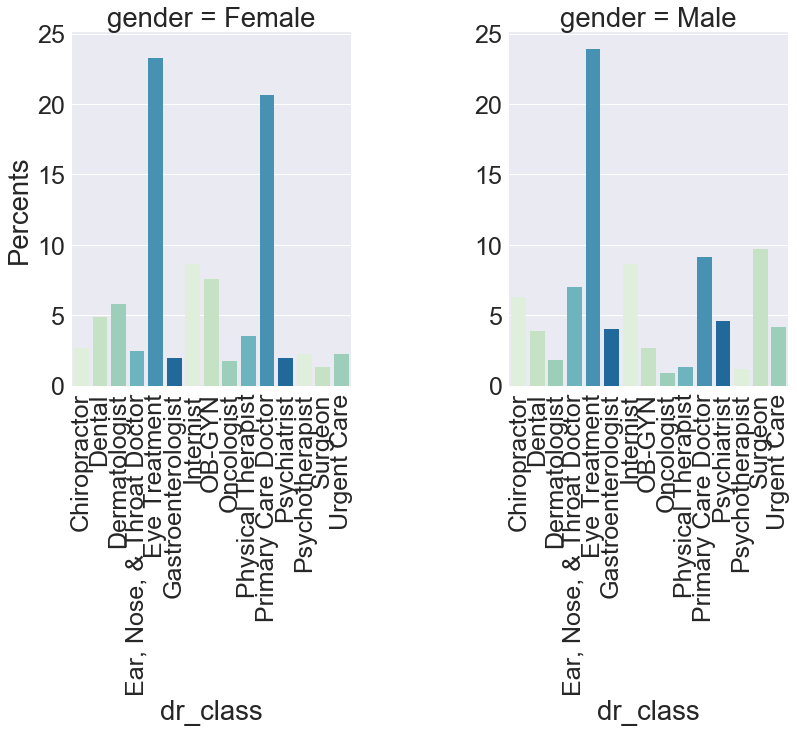

In [59]:
#Doctor type by gender 
g = sns.factorplot(x="dr_class", y="Percents", col="gender", data=gender_percents4, kind="bar", size=7, aspect=.9, palette=sns.color_palette("GnBu"))
g.set_xticklabels(rotation=90)

In [60]:

overall_rating_percents



,overall_rating,boro,boro_count,doctor,Percents
0,2.5,Manhattan,652,1,0.153374
1,3.5,Brooklyn,265,3,1.132075
2,3.5,Manhattan,652,1,0.153374
3,3.5,Queens,70,2,2.857143
4,4.0,Bronx,21,1,4.761905
5,4.0,Brooklyn,265,28,10.566038
6,4.0,Manhattan,652,14,2.147239
7,4.0,New Jersey,105,9,8.571429
8,4.0,Queens,70,4,5.714286
9,4.0,Staten Island,8,2,25.000000


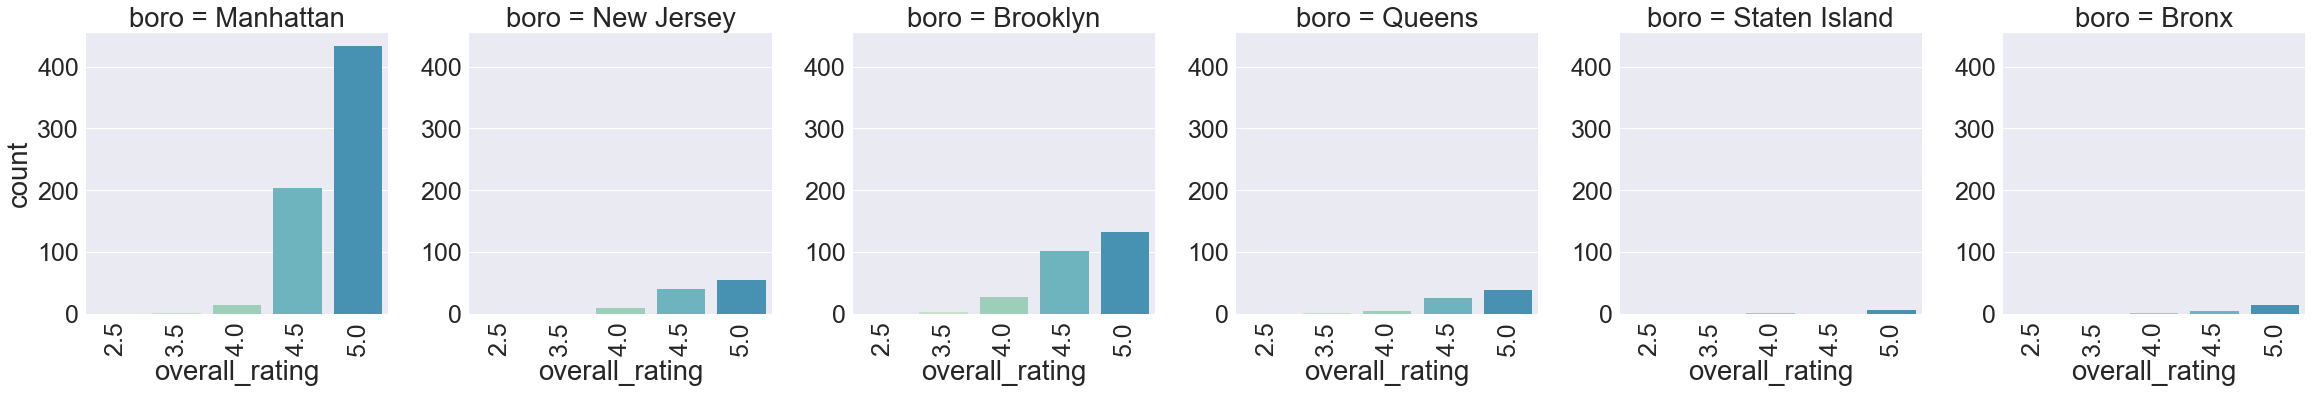

In [61]:
h = sns.factorplot(x="overall_rating", col="boro", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

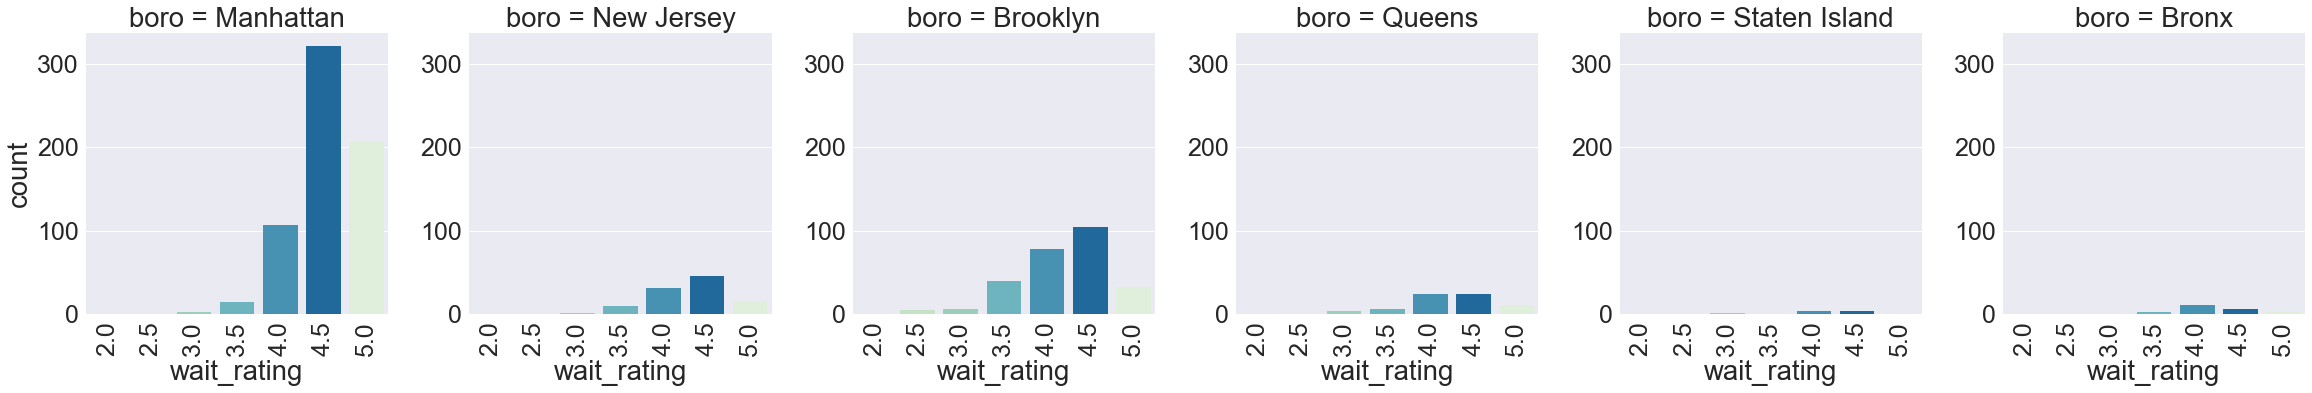

In [62]:
h = sns.factorplot(x="wait_rating", col="boro", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

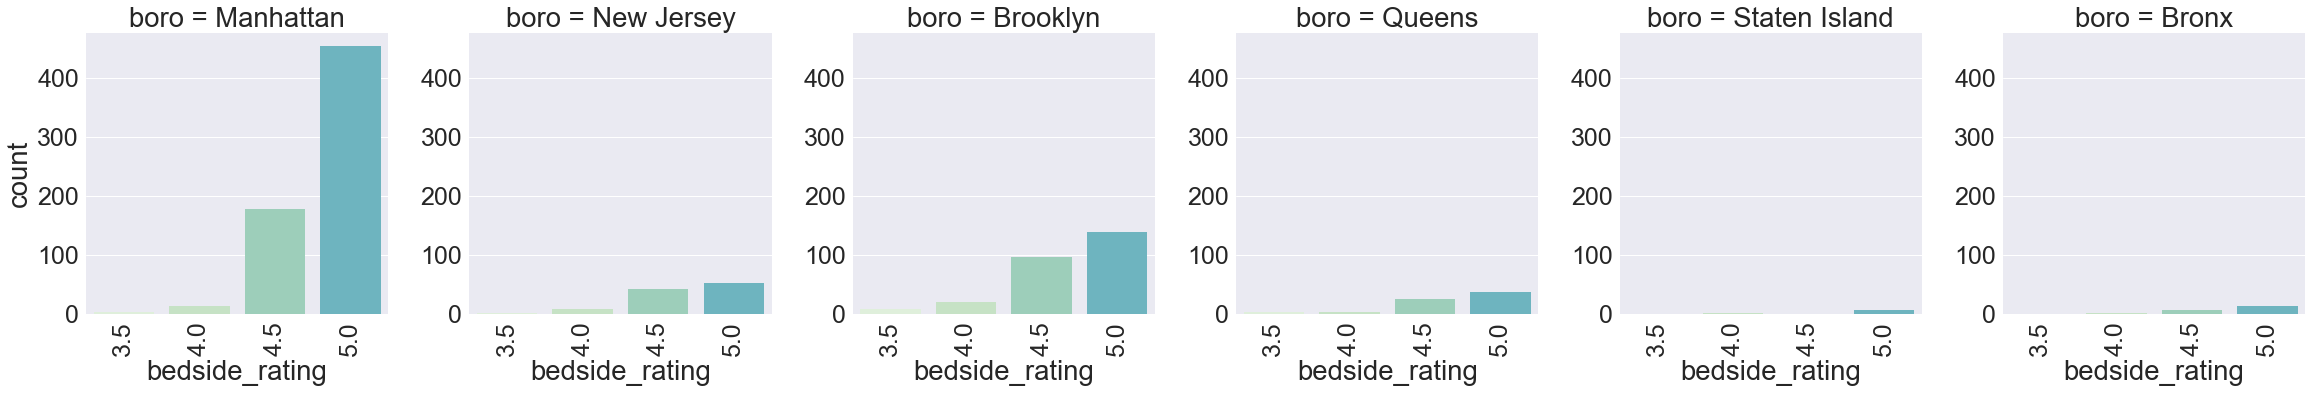

In [63]:
h = sns.factorplot(x="bedside_rating", col="boro", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

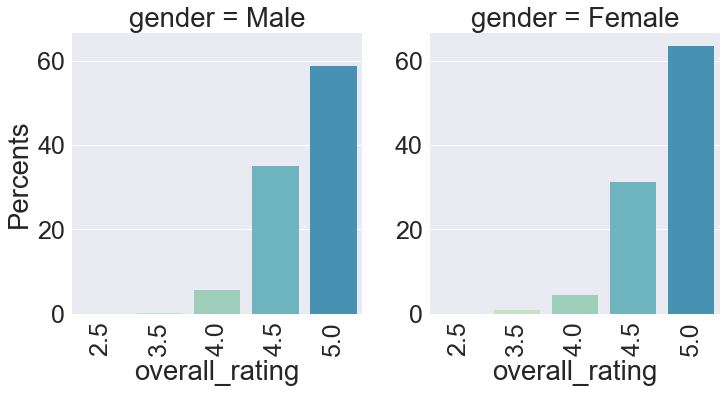

In [76]:
h = sns.factorplot(x="overall_rating", y="Percents", col="gender", data=gender_percents, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)


gender_percents=zoc_df3.groupby(['overall_rating','gender','gender_count']).agg({'doctor':"count"}).reset_index()
gender_percents=pd.DataFrame(gender_percents)
gender_percents.gender_count=gender_percents.gender_count.astype(dtype=int)
gender_percents['Percents']=gender_percents['doctor']/gender_percents['gender_count']*100

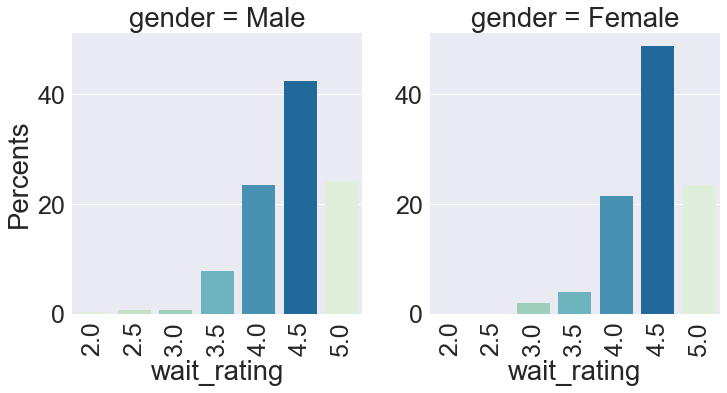

In [65]:
h = sns.factorplot(x="wait_rating", y="Percents", col="gender", data=gender_percents3, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

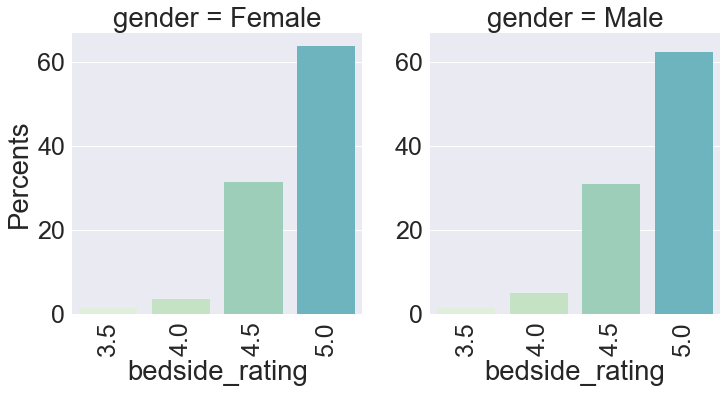

In [66]:
h = sns.factorplot(x="bedside_rating", y="Percents", col="gender", data=gender_percents2, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)